In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv')
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [3]:
df.shape

(37249, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [5]:
df.isnull().sum()

clean_comment    100
category           0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.duplicated().sum()

np.int64(350)

In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [9]:
df[df['clean_comment'].str.strip()=='']

,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


In [10]:
df=df[~(df['clean_comment'].str.strip()=='')]

In [11]:
df['clean_comment']=df['clean_comment'].str.lower()
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [12]:
df[df['clean_comment'].apply(lambda x:x.endswith(' ') or x.startswith(' '))]

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37241,let the janta decide not ulema clerics,0
37242,hona hai same with vaccination education insu...,0
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [13]:
df['clean_comment']=df['clean_comment'].str.strip()
df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' ')).sum()

np.int64(0)

In [14]:
url_pattern= r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
comments_with_urls=df[df['clean_comment'].str.contains(url_pattern,regex=True)]
comments_with_urls.head()

,clean_comment,category


In [15]:
comments_with_newline=df[df['clean_comment'].str.contains('\n')]
comments_with_newline.head()

,clean_comment,category
448,what missing jpg\nand why this brilliant edit ...,1
781,india has been ruined congress and populist sc...,-1
847,like aap for its stand corruption and making p...,-1
871,reduced trade\ndeficit stronger rupee aren the...,0
1354,amsa press conference australian maritime safe...,1


In [16]:
df['clean_comment']=df['clean_comment'].str.replace('\n',' ',regex=True)
comments_with_newline_remain=df[df['clean_comment'].str.contains('\n')]
comments_with_newline_remain

,clean_comment,category


<Axes: xlabel='category', ylabel='count'>

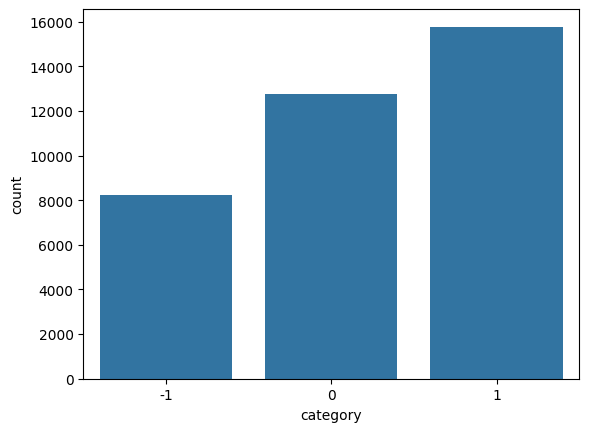

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df,x='category')

In [18]:
df['category'].value_counts(normalize=True).mul(100).round(2)

category
 1    42.86
 0    34.71
-1    22.42
Name: proportion, dtype: float64

In [19]:
df['word_count']=df['clean_comment'].apply(lambda x: len(x.split()))

In [20]:
df.sample(5)

,clean_comment,category,word_count
12940,isis clearly are targeting the wrong country j...,-1,35
2841,cool,1,1
19070,don know whether modi govt created job trolls ...,0,17
27187,think you got some very good points here and t...,1,12
29488,there were whatsapp forwards saying modi depos...,1,15


In [21]:
df['word_count'].describe()

count    36793.000000
mean        29.667464
std         56.790738
min          1.000000
25%          6.000000
50%         13.000000
75%         30.000000
max       1307.000000
Name: word_count, dtype: float64

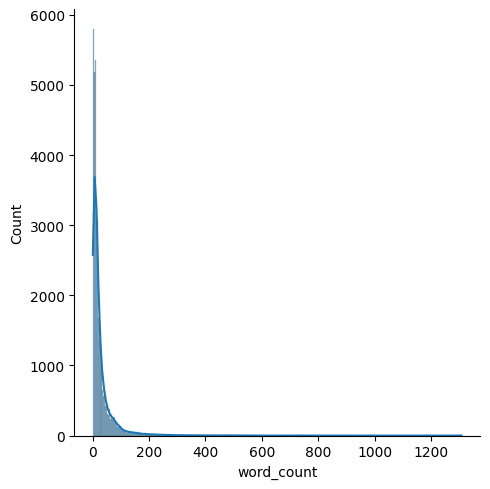

In [22]:
sns.displot(df['word_count'],kde=True)

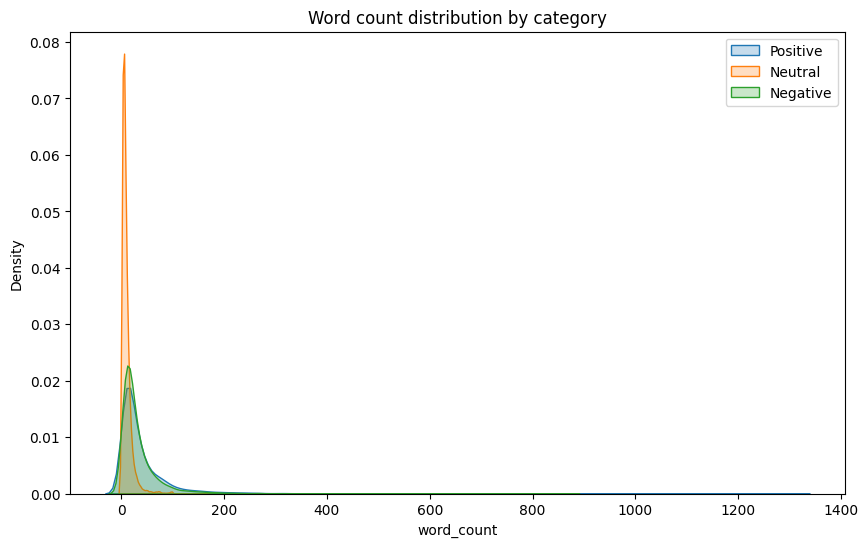

In [23]:
plt.figure(figsize=(10,6))

sns.kdeplot(df[df['category']==1]['word_count'],label='Positive',fill=True)
sns.kdeplot(df[df['category']==0]['word_count'],label='Neutral',fill=True)
sns.kdeplot(df[df['category']==-1]['word_count'],label='Negative',fill=True)

plt.title('Word count distribution by category')
plt.xlabel('word_count')
plt.ylabel('Density')

plt.legend()
plt.show()

<Axes: ylabel='word_count'>

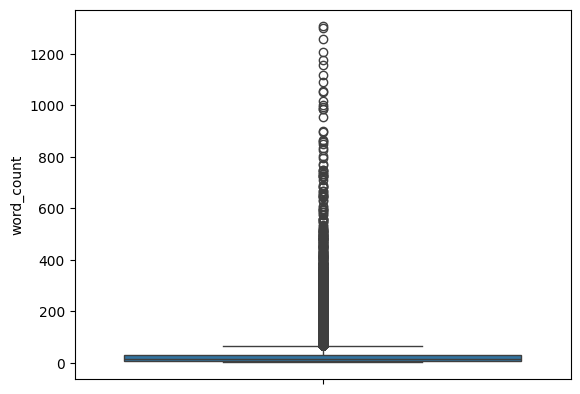

In [24]:
sns.boxplot(df['word_count'])

In [25]:
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')

stop_words=set(stopwords.words('english'))
df['num_stop_words']=df['clean_comment'].apply(lambda x:len([word for word in x.split() if word in stop_words]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nihal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
df.sample(5)

,clean_comment,category,word_count,num_stop_words
7958,seems germany knew merkel statement was shit,-1,7,1
12151,considering how sexual assault males are not t...,1,29,12
34697,stupid move raga should contesting from seat t...,-1,68,23
30787,corrupted government this just insane may alla...,-1,15,4
14421,plz someone work plz shop indian facebook new ...,1,16,3


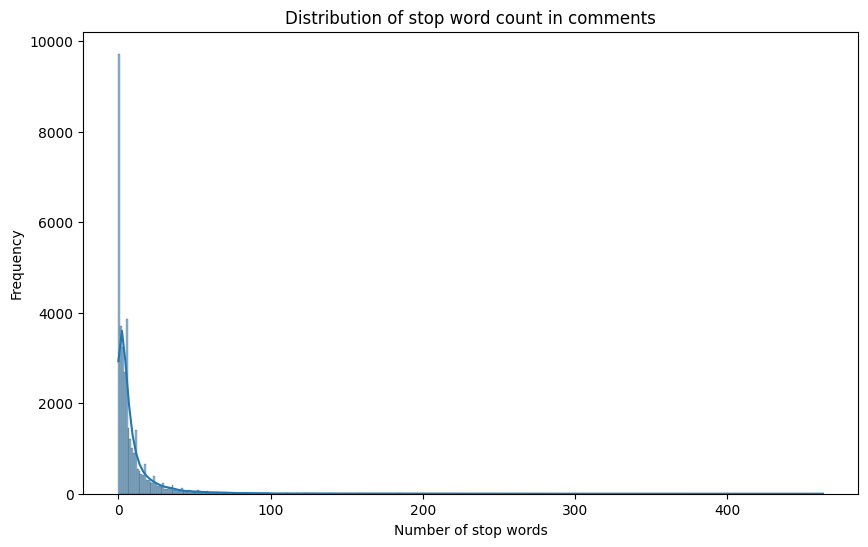

In [27]:
plt.figure(figsize=(10,6))
sns.histplot(df['num_stop_words'],kde=True)
plt.title('Distribution of stop word count in comments')
plt.xlabel('Number of stop words')
plt.ylabel('Frequency')
plt.show()

C:\Users\nihal\AppData\Local\Temp\ipykernel_16308\1750478633.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_df,x='count',y='stop_words',palette='viridis')


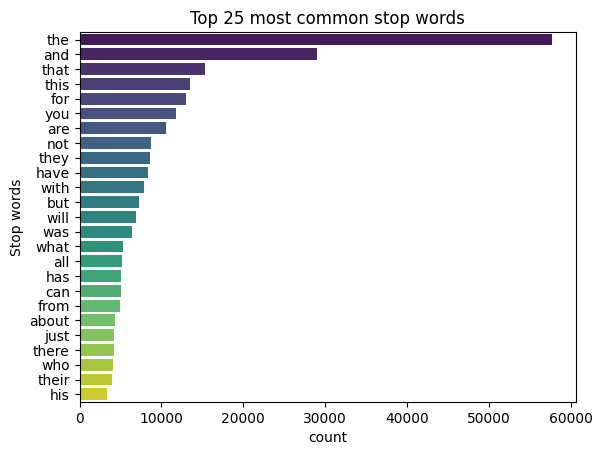

In [28]:
from collections import Counter

all_stop_words=[word for comment in df['clean_comment'] for word in comment.split() if word in stop_words]
most_common_stop_words=Counter(all_stop_words).most_common(25)
top_25_df=pd.DataFrame(most_common_stop_words,columns=['stop_words','count'])

plt.Figure(figsize=(12,8))
sns.barplot(data=top_25_df,x='count',y='stop_words',palette='viridis')
plt.title('Top 25 most common stop words')
plt.xlabel('count')
plt.ylabel('Stop words')
plt.show()

In [29]:
df['num_chars']=df['clean_comment'].apply(len)
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars
0,family mormon have never tried explain them th...,1,39,13,259
1,buddhism has very much lot compatible with chr...,1,196,59,1268
2,seriously don say thing first all they won get...,-1,86,40,459
3,what you have learned yours and only yours wha...,0,29,15,167
4,for your own benefit you may want read living ...,1,112,45,690


In [30]:
from collections import Counter

all_text=' '.join(df['clean_comment'])

char_frequency=Counter(all_text)
char_frequency_df=pd.DataFrame(char_frequency.items(),columns=('character','frequency')).sort_values(by='frequency',ascending=False)

In [31]:
char_frequency_df['character'].values

array([' ', 'e', 't', ..., '段', '她', '谁'], shape=(1378,), dtype=object)

In [32]:
char_frequency_df.tail(50)

,character,frequency
1286,货,1
1287,语,1
1312,耐,1
1313,精,1
342,━,1
345,⊂,1
346,゜,1
347,ｊ,1
1289,显,1
1291,鞋,1


In [33]:
df['num_punctuation_chars']=df['clean_comment'].apply(
    lambda x: sum([1 for char in x if char in '.,!?;:"\'()[]{}-'])
)
df.sample(5)

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
12822,crony capitalism and corruption bhaktas please...,0,12,4,75,0
30811,woomania bhaiyya bihar,0,3,0,22,0
20139,and all others accepted the lie which the part...,1,90,37,530,0
1496,yes look this post learly written the article ...,-1,23,9,129,0
16523,coalition government karnataka free speech und...,1,10,1,77,0


C:\Users\nihal\AppData\Local\Temp\ipykernel_16308\3179851394.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_bigrams_df,x='count',y='bigram',palette='magma')


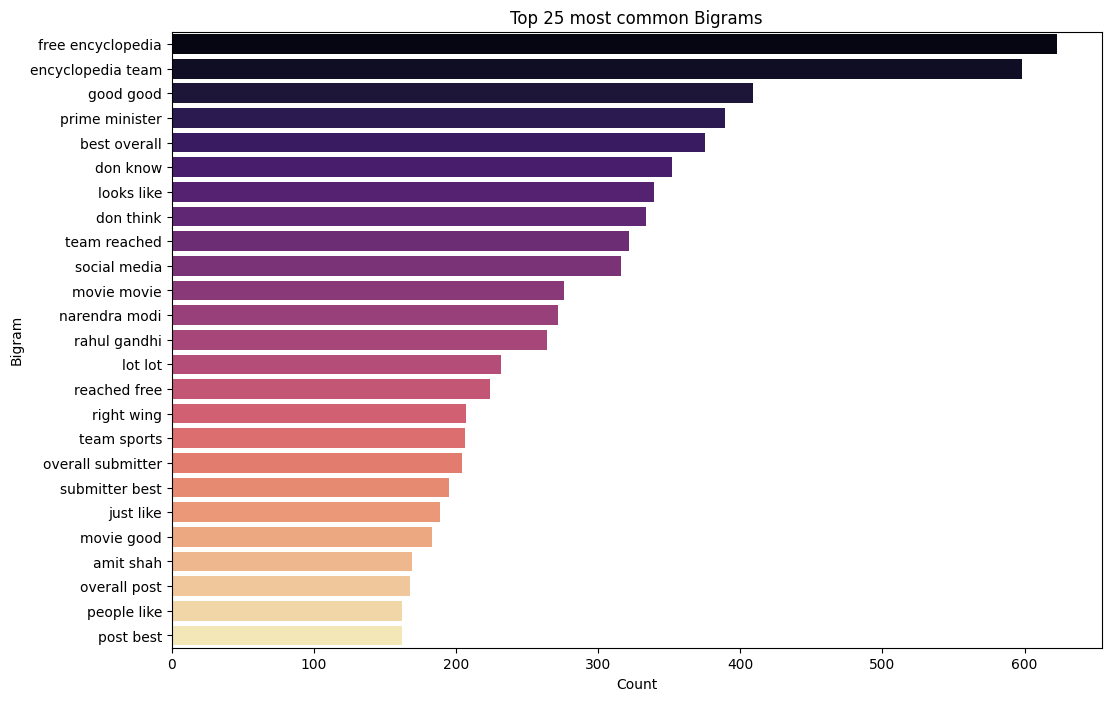

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(corpus,n=None):
    vec = CountVectorizer(ngram_range=(2,2),stop_words='english').fit(corpus)
    bag_of_words =vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key= lambda x: x[1], reverse=True)
    return words_freq[:n]

top_25_bigrams=get_top_ngrams(df['clean_comment'],25)
top_25_bigrams_df=pd.DataFrame(top_25_bigrams,columns=['bigram','count'])

plt.figure(figsize=(12,8))
sns.barplot(data=top_25_bigrams_df,x='count',y='bigram',palette='magma')
plt.title('Top 25 most common Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()

C:\Users\nihal\AppData\Local\Temp\ipykernel_16308\618754361.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_bigrams_df,x='count',y='bigram',palette='magma')


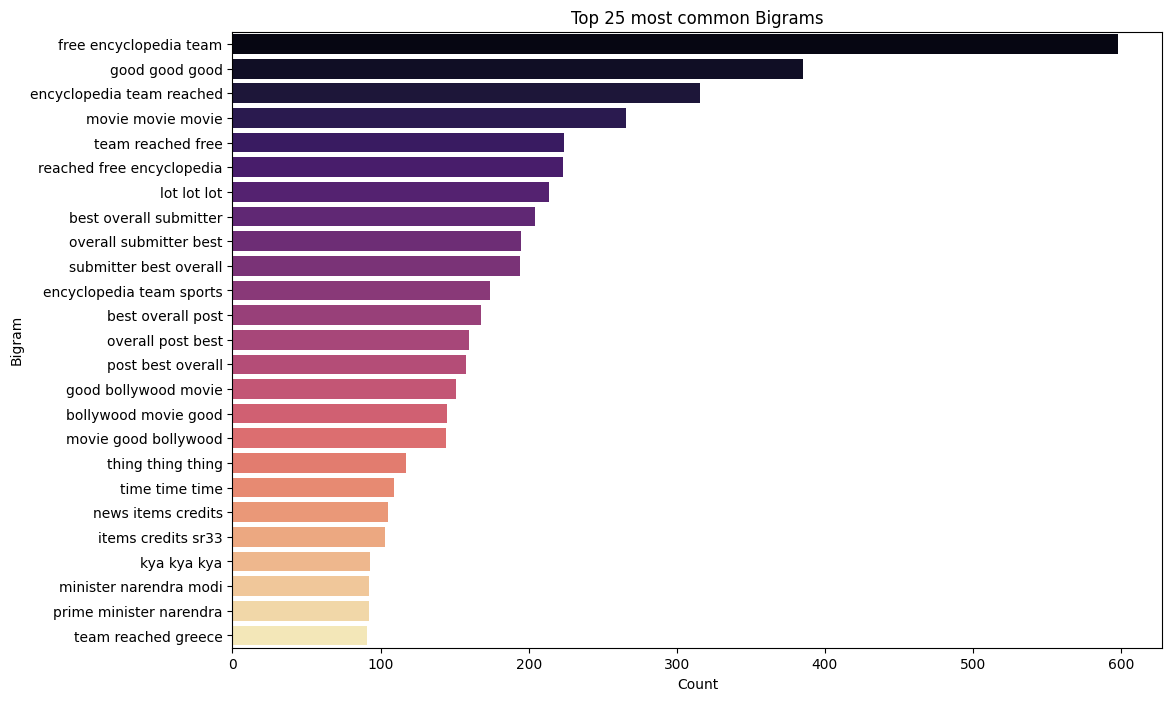

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(corpus,n=None):
    vec = CountVectorizer(ngram_range=(3,3),stop_words='english').fit(corpus)
    bag_of_words =vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key= lambda x: x[1], reverse=True)
    return words_freq[:n]

top_25_bigrams=get_top_ngrams(df['clean_comment'],25)
top_25_bigrams_df=pd.DataFrame(top_25_bigrams,columns=['bigram','count'])

plt.figure(figsize=(12,8))
sns.barplot(data=top_25_bigrams_df,x='count',y='bigram',palette='magma')
plt.title('Top 25 most common Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()

In [36]:
import re
df['clean_comment']=df['clean_comment'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s!?.,]','',str(x)))

In [37]:
all_text=' '.join(df['clean_comment'])

char_frequency=Counter(all_text)

char_frequency_df=pd.DataFrame(char_frequency.items(),columns=['character','frequency']).sort_values(by='frequency')

char_frequency_df

,character,frequency
39,,1
40,,3
37,\t,11
38,,76
33,8,1199
36,7,1291
28,6,1403
29,4,1573
35,3,1617
27,5,1631


In [38]:
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon have never tried explain them th...,1,39,13,259,0
1,buddhism has very much lot compatible with chr...,1,196,59,1268,0
2,seriously don say thing first all they won get...,-1,86,40,459,0
3,what you have learned yours and only yours wha...,0,29,15,167,0
4,for your own benefit you may want read living ...,1,112,45,690,0


In [39]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))-{'not','but','however','no','yet'}

df['clean_comment']=df['clean_comment'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
)

In [40]:
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


In [41]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

df['clean_comment']=df['clean_comment'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)

df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nihal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


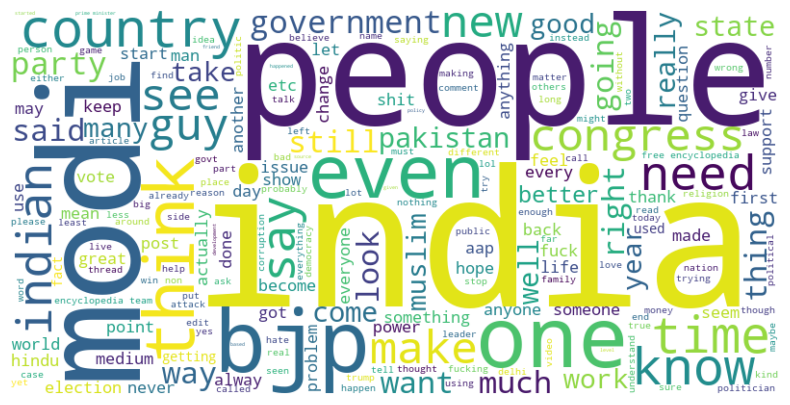

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud= WordCloud(width=800,height=400,background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')

plot_word_cloud(df['clean_comment'])

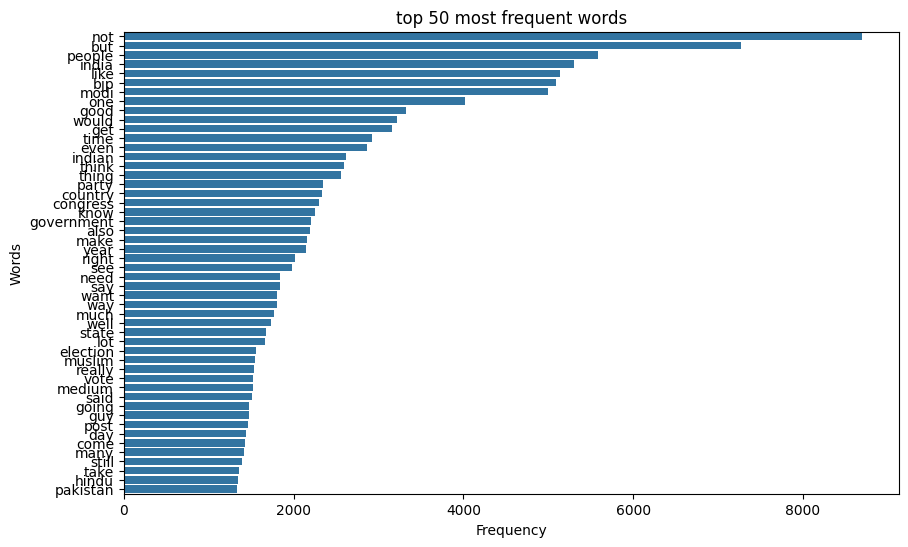

In [43]:
def plot_top_n_words(df,n=20):
    words=' '.join(df['clean_comment']).split()

    counter = Counter(words)
    most_common_words=counter.most_common(n)
    words,counts=zip(*most_common_words)

    plt.figure(figsize=(10,6))
    sns.barplot(x=list(counts),y=list(words))
    plt.title(f'top {n} most frequent words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

plot_top_n_words(df,n=50)

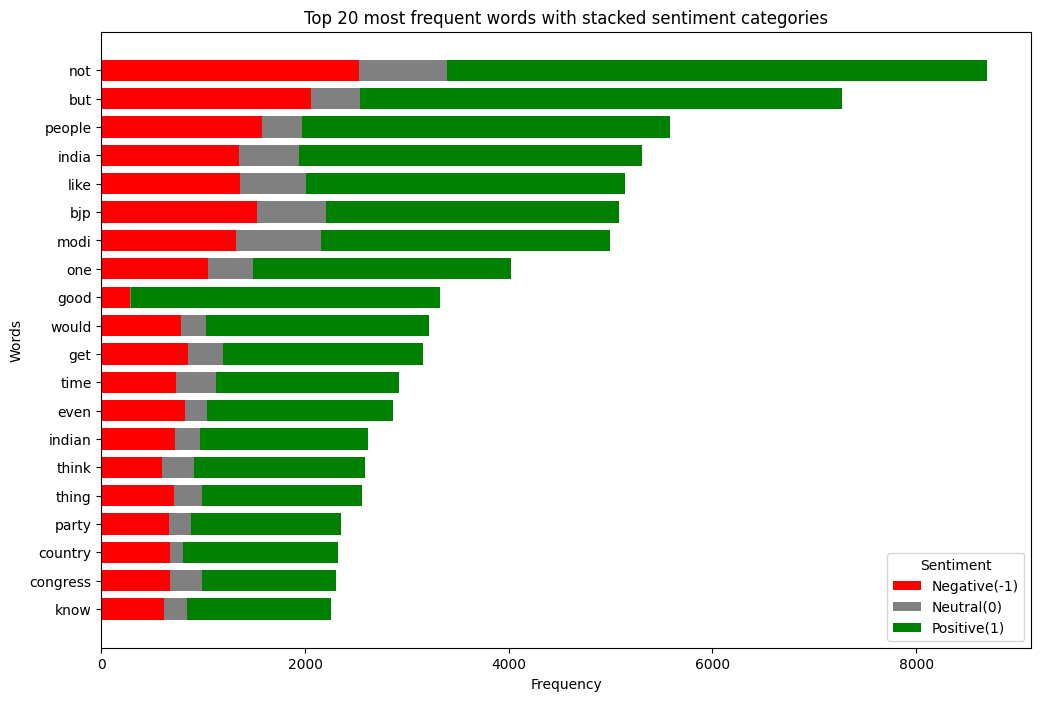

In [44]:
def plot_top_n_words_by_category(df,n=20,start=0):
    word_category_counts={}

    for idx, row in df.iterrows():
        words = row['clean_comment'].split()
        category = row['category']

        for word in words:
            if word not in word_category_counts:
                word_category_counts[word]={ -1 : 0 , 0 : 0 , 1 : 0 }

            word_category_counts[word][category]+=1

    total_word_counts={word:sum(counts.values()) for word, counts in word_category_counts.items()}

    most_common_words=sorted(total_word_counts.items(),key=lambda x:x[1],reverse=True)[start:start+n]
    top_words = [word for word, _ in most_common_words]

    word_labels=top_words
    negative_counts=[word_category_counts[word][-1] for word in top_words]
    neutral_counts=[word_category_counts[word][0] for word in top_words]
    positive_counts=[word_category_counts[word][1] for word in top_words]

    plt.figure(figsize=(12,8))
    bar_width=0.75

    plt.barh(word_labels, negative_counts, color='red', label='Negative(-1)',height=bar_width)
    plt.barh(word_labels, neutral_counts, left=negative_counts, color='gray', label='Neutral(0)',height=bar_width)
    plt.barh(word_labels, positive_counts, left=[i+j for i,j in zip(negative_counts,neutral_counts)], color='green', label='Positive(1)',height=bar_width)

    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top {n} most frequent words with stacked sentiment categories')
    plt.legend(title='Sentiment',loc='lower right')
    plt.gca().invert_yaxis()
    plt.show()
plot_top_n_words_by_category(df,n=20)

In [45]:
import mlflow

mlflow.set_tracking_uri("http://ec2-98-90-201-65.compute-1.amazonaws.com:5000/")

with mlflow.start_run():
    mlflow.log_param("param1",15)
    mlflow.log_metric("metric1",0.89)

🏃 View run flawless-cod-59 at: http://ec2-98-90-201-65.compute-1.amazonaws.com:5000/#/experiments/0/runs/2cc99f180aa642fea8e2babd751cd1b8
🧪 View experiment at: http://ec2-98-90-201-65.compute-1.amazonaws.com:5000/#/experiments/0


In [46]:
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
vectorizer= CountVectorizer(max_features=10000)

In [48]:
X= vectorizer.fit_transform(df['clean_comment']).toarray()
y=df['category']

In [49]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(36793, 10000))

In [50]:
X.shape

(36793, 10000)

In [51]:
y.shape

(36793,)

In [52]:
y

0        1
1        1
2       -1
3        0
4        1
        ..
37244    0
37245    1
37246    0
37247    1
37248    0
Name: category, Length: 36793, dtype: int64

In [53]:
mlflow.set_tracking_uri("http://ec2-98-90-201-65.compute-1.amazonaws.com:5000/")

In [54]:
mlflow.set_experiment("RF Baseline")

2025/10/06 20:50:00 INFO mlflow.tracking.fluent: Experiment with name 'RF Baseline' does not exist. Creating a new experiment.


<Experiment: artifact_location='s3://mlflow-bucket-96/249147854548505124', creation_time=1759798201271, experiment_id='249147854548505124', last_update_time=1759798201271, lifecycle_stage='active', name='RF Baseline', tags={}>

2025/10/06 21:23:45 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/06 21:23:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForest_Baseline_TrainTestSplit at: http://ec2-98-90-201-65.compute-1.amazonaws.com:5000/#/experiments/249147854548505124/runs/f8c10606c5604b55a2bc0f3b5b26ccca
🧪 View experiment at: http://ec2-98-90-201-65.compute-1.amazonaws.com:5000/#/experiments/249147854548505124
accuracy: 0.6479141187661367


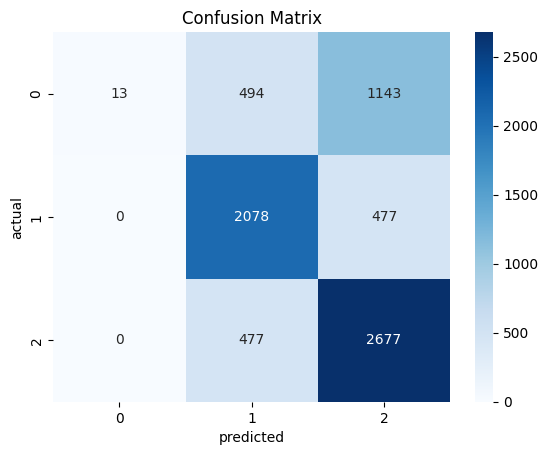

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

with mlflow.start_run() as run:
    mlflow.set_tag("mlflow.runName","RandomForest_Baseline_TrainTestSplit")
    mlflow.set_tag("experiment_type","baseline")
    mlflow.set_tag("model_type","RandomForestClassifier")

    mlflow.set_tag("description", "This is a baseline model for sentiment analysis built with random forest classifier")

    mlflow.log_param("vectorizer_type","CountVectorizer")
    mlflow.log_param("vectorizer_max_features",vectorizer.max_features)

    n_estimators=200
    max_depth=15

    mlflow.log_param("n_estimators",n_estimators)
    mlflow.log_param("max_depth",max_depth)

    model= RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth,random_state=42)
    model.fit(X_train,y_train)  

    y_pred=model.predict(X_test)

    accuracy=accuracy_score(y_test,y_pred)
    mlflow.log_metric("accuracy",accuracy)

    classification_rep=classification_report(y_test,y_pred,output_dict=True)
    
    for label,metrics in classification_rep.items():
        if isinstance(metrics,dict):
            for metric, value in metrics.items():
                mlflow.log_metric(f"{label}_{metric}",value)

    
    conf_matrix=confusion_matrix(y_test,y_pred)
    plt.Figure(figsize=(8,6))
    sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues")
    plt.xlabel("predicted")
    plt.ylabel("actual")
    plt.title("Confusion Matrix")

    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")

    mlflow.sklearn.log_model(model,"random_forest_model")

    df.to_csv("dataset.csv",index=False)
    mlflow.log_artifact("dataset.csv")

print(f"accuracy: {accuracy}")

